<a href="https://colab.research.google.com/github/nikkoganas/cs167-machine-learning-Notes/blob/main/Ganas_Notebook3_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: Nikko Ganas**


Prepare the data

In [1]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv')

# Exercise #1. 
Implement mean squared error (mse) algorithm

In [5]:
def mse(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    total = 0

    for i in range(len(actual)):
      total += (actual.iloc[i] - predicted.iloc[i])**2
    return total/len(actual)
    #   the mean squared error between the actual and predicted values
    
    

# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [9]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/winequality-white.csv')

# establish test_data and train_data here
test_data=wine_data.iloc[0:320]
train_data=wine_data.iloc[320:]


# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [12]:
import numpy

def regression_kNN(specimen, data, k):
  train_copy= train_data.copy()
  test_copy= test_data.copy()
  train_copy['distance_to_new'] = numpy.sqrt(
    (test_copy['fixed acidity']-train_copy['fixed acidity'])**2
    +(test_copy['volatile acidity']-train_copy['volatile acidity'])**2
    +(test_copy['citric acid']-train_copy['citric acid'])**2
    +(test_copy['residual sugar']-train_copy['residual sugar'])**2
    +(test_copy['chlorides']-train_copy['chlorides'])**2
    +(test_copy['free sulfur dioxide']-train_copy['free sulfur dioxide'])**2
    +(test_copy['total sulfur dioxide']-train_copy['total sulfur dioxide'])**2
    +(test_copy['density']-train_copy['density'])**2
    +(test_copy['pH']-train_copy['pH'])**2
    +(test_copy['sulphates']-train_copy['sulphates'])**2
    +(test_copy['alcohol']-train_copy['alcohol'])**2
    )
  sorted_data = train_copy.sort_values(['distance_to_new']) 
  

  return sorted_data.iloc[0:k]['quality'].mean()

In [18]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)

In [19]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [20]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

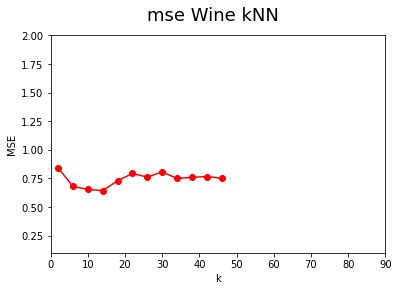

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
k_val=range(2,50,4)

kNN_mse=[]
for k in k_val:
  prediction = regressions_all_kNN(test_data, train_data, k)
  current_mse = mse(test_norm_data['quality'], prediction)
  kNN_mse.append(current_mse)

plt.suptitle('mse Wine kNN', fontsize = 18)
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(k_vals, kNN_mse, 'ro-', label = 'kNN')
plt.axis([0,50,0.1,2])
plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

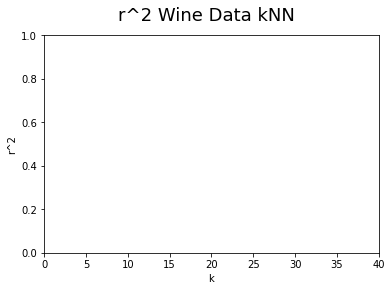

In [41]:
import sklearn.metrics as sklearn

def r2(actual_values, predicted_values ):
  r2_val = sklearn.r2_score(actual_values, predicted_values)
  return r2_val

import matplotlib.pyplot as plt
%matplotlib inline

kval2 = range(2,50,4)
kNN_r2 = []

for k in kval2:
  prediction_r2 = regressions_all_kNN(test_data, train_data, k)
  current_r2 = r2(test_norm_data['quality'], prediction_r2)
  kNN_r2.append(current_r2)

plt.suptitle('r^2 Wine Data kNN', fontsize = 18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals, kNN_r2, 'ro-', label = 'r2')
plt.axis([0,40,0,1])
plt.show()


# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

after running the code there are some conclusions that can be made regarding the best numbers for K for K-NN algorithm. i would say the best number for the algorithm is about 14. each of the exercises reacted differrently when given different K values. based on the way the programs reacted that is how i believe 14 to be a good number for K.
